In [2]:
import re
from collections import defaultdict
import os

In [3]:
base_file_path = "ViT-B-32_"

In [4]:
def process_file_results(file_path):
    print(f"Processing file: {file_path}")
    # Read the file
    with open(file_path, "r") as f:
        lines = f.readlines()

    # Initialize storage
    accuracies = defaultdict(list)

    # Iterate and collect accuracies
    current_dataset = None
    for line in lines:
        dataset_match = re.match(r"([A-Za-z0-9]+)\s*$", line.strip())
        accuracy_match = re.search(r"Best accuracy ([\d.]+)", line)

        if dataset_match:
            current_dataset = dataset_match.group(1)

        if accuracy_match and current_dataset:
            accuracy = float(accuracy_match.group(1))
            accuracies[current_dataset].append(accuracy)

    # Compute and print averages
    total_avg = 0
    count = 0

    print("Per-dataset average accuracies:\n")
    for dataset, accs in sorted(accuracies.items()):
        avg = sum(accs) / len(accs)
        print(f"{dataset}: {avg:.2f}")
        total_avg += avg
        count += 1

    overall_avg = total_avg / count
    print(f"\nOverall average accuracy: {overall_avg:.2f}")


In [5]:
def print_dir_results(folder_path):
    for subdir, _, files in os.walk(folder_path):
        if "results.txt" in files:
            result_file_path = os.path.join(subdir, "results.txt")
            process_file_results(result_file_path)
        print()

In [6]:
root_dir = base_file_path + "RandLoRA6"
print_dir_results(root_dir)




Processing file: ViT-B-32_RandLoRA6/0.5/1/results.txt
Per-dataset average accuracies:

CIFAR10: 97.64
CIFAR100: 85.43
CUB200: 70.38
Cars: 78.40
DTD: 69.26
EuroSAT: 98.57
Flowers102: 89.02
Food101: 87.96
GTSRB: 95.38
MNIST: 99.18
OxfordIIITPet: 89.81
PascalVOC: 87.99
RESISC45: 94.32
STL10: 98.10
SUN397: 65.24
SVHN: 95.39

Overall average accuracy: 87.63



Processing file: ViT-B-32_RandLoRA6/1/1/results.txt
Per-dataset average accuracies:

CIFAR10: 80.78
CIFAR100: 62.00
CUB200: 44.37
Cars: 44.89
DTD: 49.26
EuroSAT: 78.33
Flowers102: 70.94
Food101: 63.49
GTSRB: 70.76
MNIST: 76.15
OxfordIIITPet: 69.45
PascalVOC: 53.19
RESISC45: 70.05
STL10: 85.76
SUN397: 42.70
SVHN: 28.05

Overall average accuracy: 61.89



Processing file: ViT-B-32_RandLoRA6/1.0/1/results.txt
Per-dataset average accuracies:

CIFAR10: 98.07
CIFAR100: 87.68
CUB200: 74.51
Cars: 83.93
DTD: 72.71
EuroSAT: 99.06
Flowers102: 94.67
Food101: 89.67
GTSRB: 96.44
MNIST: 99.26
OxfordIIITPet: 91.66
PascalVOC: 88.31
RESISC45: 95.78
S

In [7]:
import os
import re
from collections import defaultdict

def process_file_results(file_path):
    print(f"Processing file: {file_path}")
    # Read the file
    with open(file_path, "r") as f:
        lines = f.readlines()

    # Fixed order of datasets for printing
    ordered_datasets = [
        "Cars", "DTD", "EuroSAT", "GTSRB", "MNIST", "RESISC45", "SUN397", "SVHN",
        "CIFAR10", "CIFAR100", "STL10", "Food101", "Flowers102", "OxfordIIITPet",
        "CUB200", "PascalVOC"
    ]

    # Initialize storage
    accuracies = defaultdict(list)

    # Extract accuracies
    current_dataset = None
    for line in lines:
        dataset_match = re.match(r"([A-Za-z0-9]+)\s*$", line.strip())
        accuracy_match = re.search(r"Best accuracy ([\d.]+)", line)

        if dataset_match:
            current_dataset = dataset_match.group(1)

        if accuracy_match and current_dataset:
            accuracy = float(accuracy_match.group(1))
            accuracies[current_dataset].append(accuracy)

    # Build comma-separated accuracy string
    avg_accuracies = []
    for dataset in ordered_datasets:
        accs = accuracies.get(dataset, [])
        if accs:
            avg = sum(accs) / len(accs)
            avg_accuracies.append(f"{avg:.2f}")
        else:
            avg_accuracies.append("N/A")

    print(",".join(avg_accuracies))


In [12]:
root_dir = base_file_path + "RandLoRA6/1.0/1/results.txt" 
process_file_results(root_dir)


Processing file: ViT-B-32_RandLoRA6/1.0/1/results.txt
83.93,72.71,99.06,96.44,99.26,95.78,67.48,96.29,98.07,87.68,98.49,89.67,94.67,91.66,74.51,88.31


In [17]:
import matplotlib.pyplot as plt

def plot_fewshot_comparison(paper_randlora6, my_randlora6):
    # Set x-axis as string labels (categorical to avoid overlap)
    shot_labels = ["1", "2", "4", "16", "50%", "100%"]
    x = range(len(shot_labels))  # [0, 1, 2, 3, 4, 5]

    # Plot styles for each method
    plt.figure(figsize=(6, 5))
    plt.plot(x, paper_randlora6, "-o", color="#D62788", label="paper_randlora6", linewidth=2, markersize=6)
    plt.plot(x, my_randlora6, "-o", color="#FF7F0E", label="my_randlora6", linewidth=2, markersize=6)

    # Axis settings
    plt.xticks(x, shot_labels)
    plt.yticks(range(60,92, 4))
    plt.ylim(60, 92)
    plt.xlabel("Shots", fontsize=12)
    plt.ylabel("Avg. Accuracy (%)", fontsize=12)

    # Style and legend
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.title("Paper experiments reproduction results")
    plt.legend(loc="lower right", fontsize=10)
    plt.tight_layout()
    plt.show()


In [13]:
paper_randlora6 = [65.68125, 70.70625, 75.20625, 81.68125, 87.71875, 89.85]
my_randlora6 = [61.885625, 67.600625, 73.908125, 81.915, 87.629, 89.626]

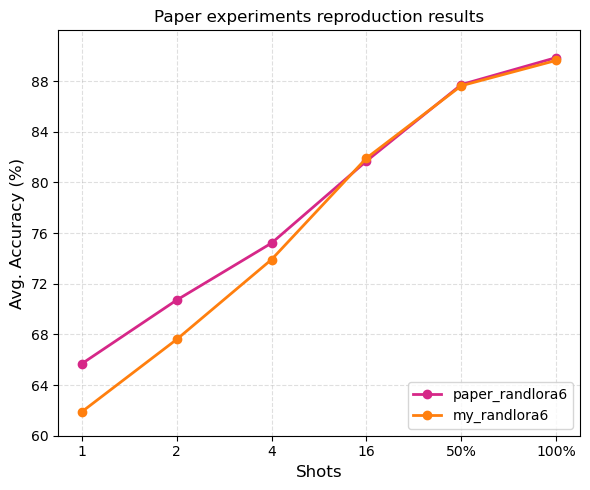

In [18]:
plot_fewshot_comparison(paper_randlora6, my_randlora6)